## <center>Elements Of Data Science - F2021</center>
# <center>Week 12: Time Series, Imbalanced Classes, Data Processing and Delivery<center>
### <center>12/6/2021</center>

# TODOs

- Readings:
  - Recommended: DSFS: [Chap 23: Databases and SQL](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3dnlebk%26AN%3d979529%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_275)
  - Final Review Sheet
<br>

- HW4, **Due Saturday December 11th 11:59pm ET**
- Quiz 11, **Due Sunday December 12th, 11:59pm ET**
- Final
 - Released Monday night December 13th, 11:59pm
 - **Due Wednesday December 15th, 11:59pm ET**
 - Have 24hrs after starting exam to finish
 - 30-40 questions (fill in the blank/multiple choice/short answer)
 - Online via Gradescope
 - Questions asked/answered **privately** via Ed
 - Open-book, open-note, open-python

# Today

- Finish Time Series
- Imbalanced Classes
- Data processing and delivery

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Environment Setup

In [1]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

# Time Series in Python so far:
<br>

- `datetime .date .time .datetime .timedelta`
- format with `.strftime()`
- parse time with `pd.to_datetime()`
- `pandas Timestamp Timedelta DatetimeIndex`
- Indexing with `DatetimeIndex`
- Frequencies
- Timezones
<br>

Next: Operations on Time Series data 
- Shifting
- Resampling
- Moving Windows

# Shifting

- Moving data backward or forward in time (lagging/leading)
- Ex: calculate percent change

In [2]:
ts = pd.Series([1,2,8],
               index=pd.date_range('1/1/2019',periods=3,freq='M'))
ts

2019-01-31    1
2019-02-28    2
2019-03-31    8
Freq: M, dtype: int64

In [3]:
ts.shift(1) # last month's value

2019-01-31    NaN
2019-02-28    1.0
2019-03-31    2.0
Freq: M, dtype: float64

# Shifting

- **percent change** : 
  - (new_value - old_value) / old_value
  - (new_value / old_value) - 1

In [4]:
#  multiply by 100 to turn into a percent
((ts / ts.shift(1)) - 1) * 100

2019-01-31      NaN
2019-02-28    100.0
2019-03-31    300.0
Freq: M, dtype: float64

# Example Dataset: Twitter Stock

In [5]:
#from pandas_datareader import data
#df_twtr = data.DataReader('TWTR', start='2015', end='12/3/2021', data_source='yahoo') 
#df_twtr.to_csv('../data/twtr_20150102-20211203.csv')
df_twtr = pd.read_csv('../data/twtr_20150102-20211203.csv',parse_dates=['Date'],index_col='Date')
df_twtr.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,36.740002,35.540001,36.230000,36.560001,12062500,36.560001
2015-01-05,37.110001,35.639999,36.259998,36.380001,15062700,36.380001
2015-01-06,39.450001,36.040001,36.270000,38.759998,33050800,38.759998


In [6]:
df_twtr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1744 entries, 2015-01-02 to 2021-12-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1744 non-null   float64
 1   Low        1744 non-null   float64
 2   Open       1744 non-null   float64
 3   Close      1744 non-null   float64
 4   Volume     1744 non-null   int64  
 5   Adj Close  1744 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 95.4 KB


# Example Dataset: Twitter Stock

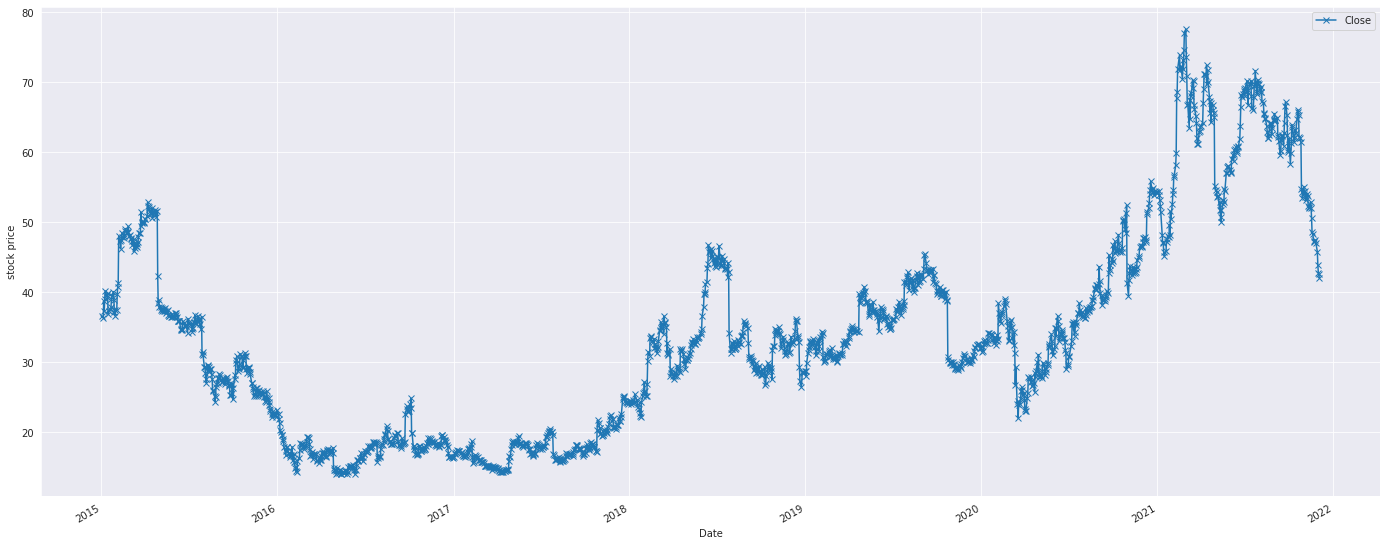

In [7]:
fig,ax = plt.subplots(1,1,figsize=(24,10))
df_twtr[['Close']].plot(ax=ax,marker='x');
ax.set_ylabel('stock price');

# Shifting Example: Percent Change Twitter Close

In [8]:
((df_twtr.Close / df_twtr.Close.shift(1)) - 1).tail(3) # # (today / yesterday) - 1

Date
2021-12-01   -0.025489
2021-12-02   -0.003970
2021-12-03   -0.013599
Name: Close, dtype: float64

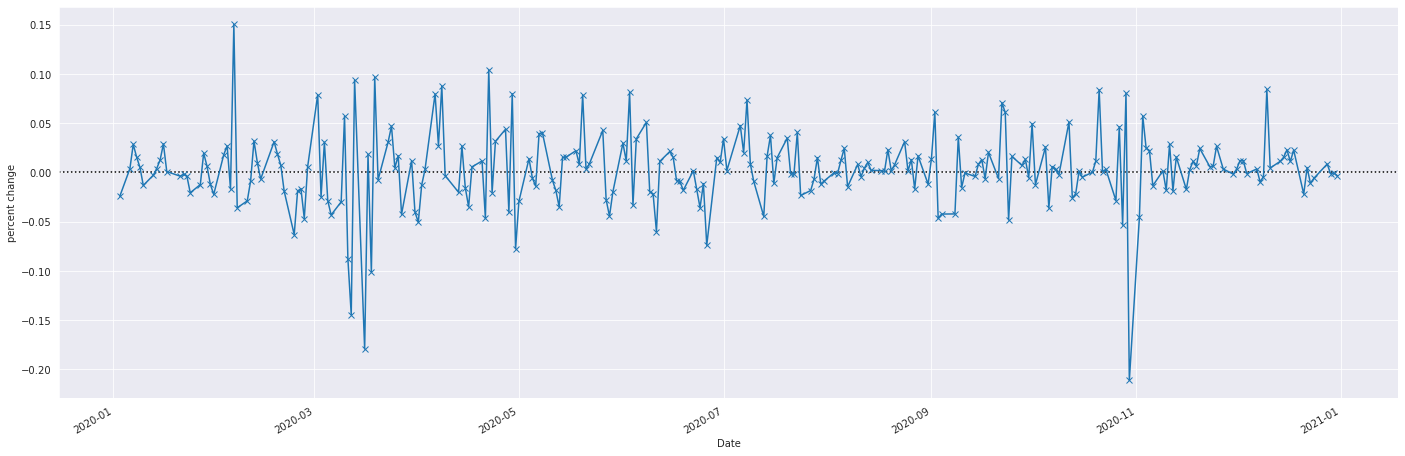

In [9]:
# plot percent change of close in 2020
fig,ax = plt.subplots(1,1,figsize=(24,8))
close_2020 = df_twtr.loc['2020','Close']
((close_2020 / close_2020.shift(1)) - 1 ).plot(marker='x',ax=ax,zorder=2);
ax.axhline(ls=':',c='k',zorder=1)
ax.set_ylabel('percent change');

# Resampling

- Convert from one frequency to another
<br>

- **Downsampling**
  - from higher to lower (day to month)
  - need to aggregate
<br>
<br>

- **Upsampling**
  - from lower to higher (month to day)
  - need to fill missing
<br>
<br>

- **Can also be used to set frequency from None**

# Resampling: Initialize Frequency

In [10]:
df_twtr.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2021-11-19', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03'],
              dtype='datetime64[ns]', name='Date', length=1744, freq=None)

In [11]:
df_twtr_B = df_twtr.resample('B').asfreq() # set frequency to business day
df_twtr_B.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03'],
              dtype='datetime64[ns]', name='Date', length=1806, freq='B')

# Resampling: Downsampling

- Go from higher/shorter to lower/longer
- Need to aggregate (like groupby)
- Example: Downsampling from business day to business quarter
    

In [12]:
df_twtr_BQ = df_twtr_B.resample('BQ')
df_twtr_BQ

In [13]:
str(df_twtr_BQ)

'DatetimeIndexResampler [freq=<BusinessQuarterEnd: startingMonth=12>, axis=0, closed=right, label=right, convention=start, origin=start_day]'

In [14]:
df_twtr_BQ.mean().head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-03-31,45.080328,43.552459,44.228688,44.335574,2.084619e+07,44.335574
2015-06-30,41.634921,40.385079,41.173492,40.874603,2.232030e+07,40.874603
2015-09-30,30.638281,29.420625,30.047812,30.000625,2.031210e+07,30.000625


# Resampling: Downsampling
    

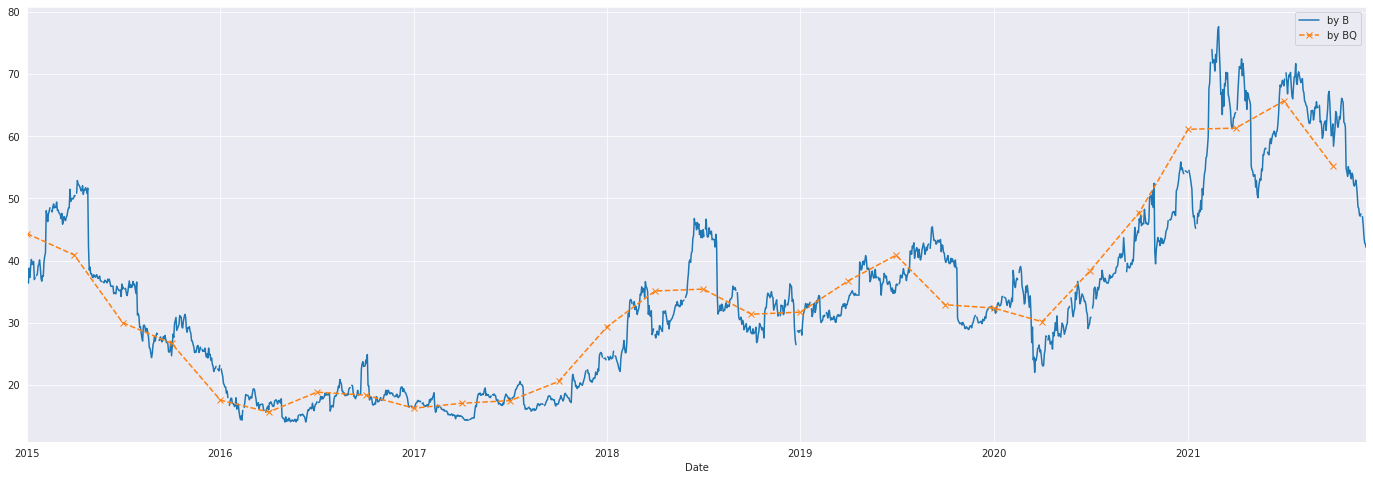

In [15]:
fig,ax = plt.subplots(1,1,figsize=(24,8))
df_twtr_B.Close.plot(style='-', label='by B',ax=ax)
df_twtr_BQ.Close.mean().plot(style='--',marker='x',label='by BQ',ax=ax)
plt.legend(loc='upper right');

# Resampling: Upsampling

- Go from lower/longer to higher/shorter
- Need to decide how to handle missing values
- Example: Upsample from business day to hour

In [16]:
df_twtr_B.index[:3]

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06'], dtype='datetime64[ns]', name='Date', freq='B')

In [17]:
df_twtr_B.Close.resample('H').asfreq().iloc[0:3]

Date
2015-01-02 00:00:00    36.560001
2015-01-02 01:00:00          NaN
2015-01-02 02:00:00          NaN
Freq: H, Name: Close, dtype: float64

In [18]:
df_twtr_B.Close.resample('H').asfreq().iloc[70:73]

Date
2015-01-04 22:00:00          NaN
2015-01-04 23:00:00          NaN
2015-01-05 00:00:00    36.380001
Freq: H, Name: Close, dtype: float64

# Resampling: Upsampling

- `ffill()` : Forward Fill

In [19]:
df_twtr_B.Close.resample('H').ffill().head(3)

Date
2015-01-02 00:00:00    36.560001
2015-01-02 01:00:00    36.560001
2015-01-02 02:00:00    36.560001
Freq: H, Name: Close, dtype: float64

- `bfill()`: Backward Fill
    

In [20]:
df_twtr_B.Close.resample('H').bfill().head(3)

Date
2015-01-02 00:00:00    36.560001
2015-01-02 01:00:00    36.380001
2015-01-02 02:00:00    36.380001
Freq: H, Name: Close, dtype: float64

# Moving/Rolling Windows

- Apply function on a fixed window moving across time
- Method of smoothing out the data
- **center** : place values at center of window
   

In [21]:
df_twtr_B.Close['2020-11-02':'2020-11-06']

Date
2020-11-02    39.470001
2020-11-03    41.730000
2020-11-04    42.759998
2020-11-05    43.709999
2020-11-06    43.119999
Freq: B, Name: Close, dtype: float64

In [22]:
rolling = df_twtr_B.Close.rolling(5, center=True)
rolling

Rolling [window=5,center=True,axis=0,method=single]

In [23]:
rolling.mean()['2020-11-02':'2020-11-06']

Date
2020-11-02    43.550000
2020-11-03    41.806000
2020-11-04    42.157999
2020-11-05    42.901999
2020-11-06    43.037999
Freq: B, Name: Close, dtype: float64

# Moving Windows

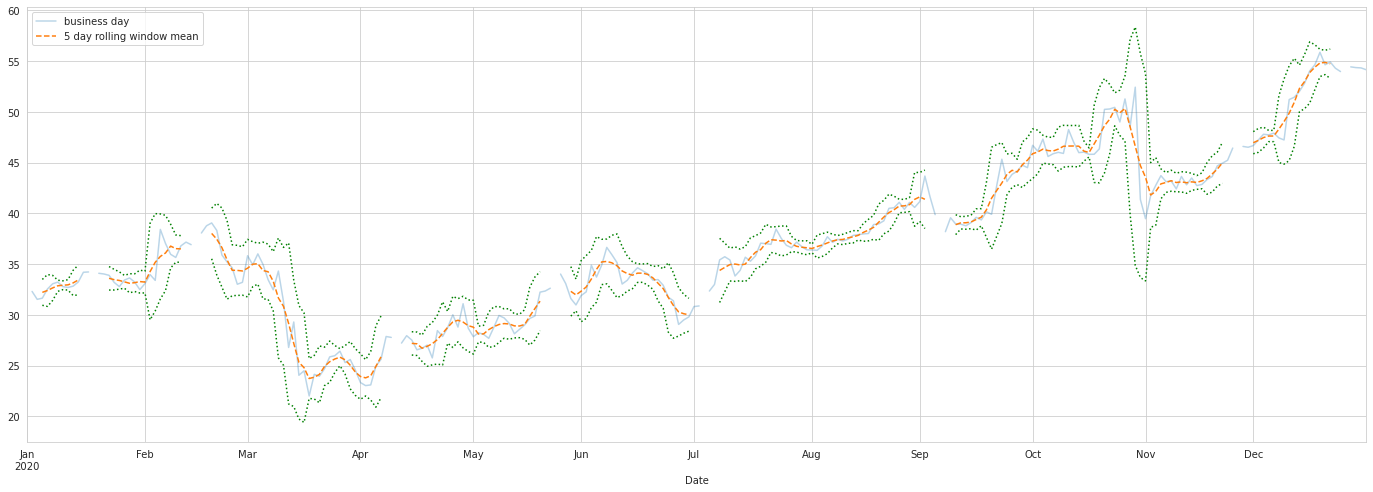

In [24]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(1,1,figsize=(24,8));
df_twtr_B.loc['2020'].Close.plot(style='-',alpha=0.3,label='business day');
rolling.mean().loc['2020'].plot(style='--',label='5 day rolling window mean');
(rolling.mean().loc['2020'] + 2*rolling.std().loc['2020']).plot(style=':',c='g',label='_nolegend_');
(rolling.mean().loc['2020'] - 2*rolling.std().loc['2020']).plot(style=':',c='g',label='_nolegend_');
ax.legend();

# Example: Bike Travel (From PDSH Chapter 3.11)
- Bicycle traffic over Fremont Bridge in Seattle in 2012
- <font size=5> Data gathered using:`!curl -o ../data/FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD`

In [25]:
df_bike = pd.read_csv('../data/FremontBridge_2015-2017.csv',parse_dates=['Date'],index_col='Date')
df_bike.columns = ['Total','East','West']
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52608 entries, 2015-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   52598 non-null  float64
 1   East    52598 non-null  float64
 2   West    52598 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


In [26]:
df_bike.head(3)

,Total,East,West
Date,,,
2015-01-01 00:00:00,13.0,4.0,9.0
2015-01-01 01:00:00,27.0,4.0,23.0
2015-01-01 02:00:00,19.0,5.0,14.0


# Example: Fill Missing Values

In [27]:
f'proportion missing: {sum(df_bike.Total.isna()) / len(df_bike):0.5f}'

'proportion missing: 0.00019'

In [28]:
df_bike = df_bike.fillna(method='ffill')
display(df_bike.head(3))

,Total,East,West
Date,,,
2015-01-01 00:00:00,13.0,4.0,9.0
2015-01-01 01:00:00,27.0,4.0,23.0
2015-01-01 02:00:00,19.0,5.0,14.0


# Plot data from 2015

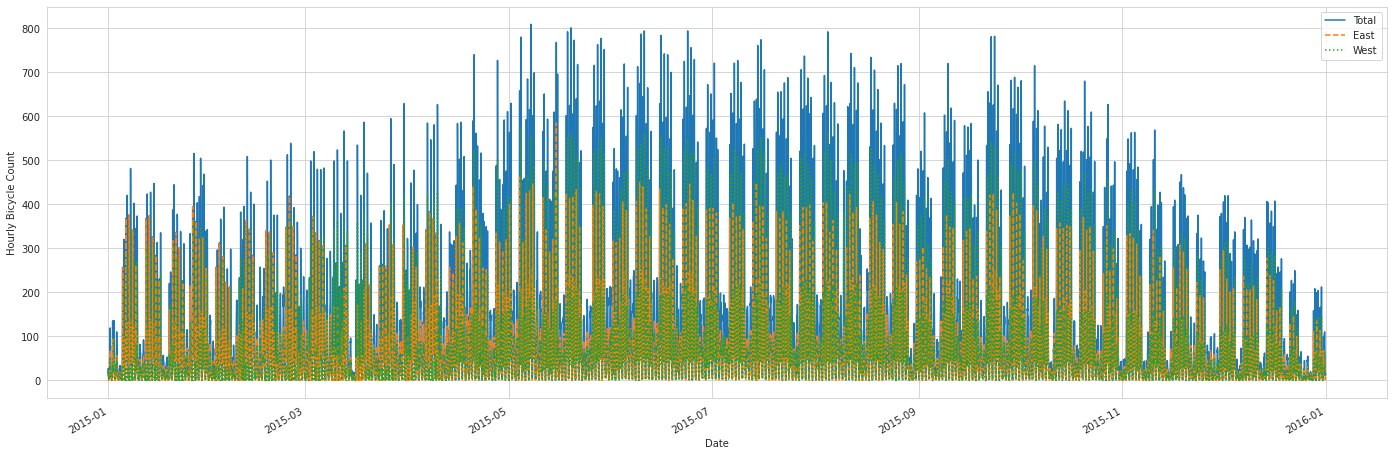

In [29]:
fig,ax = plt.subplots(1,1,figsize=(24,8))
df_bike.loc['2015'].plot(style=['-', '--', ':'],ax=ax)
plt.ylabel('Hourly Bicycle Count');

### Downsample to weekly sum to smooth things out

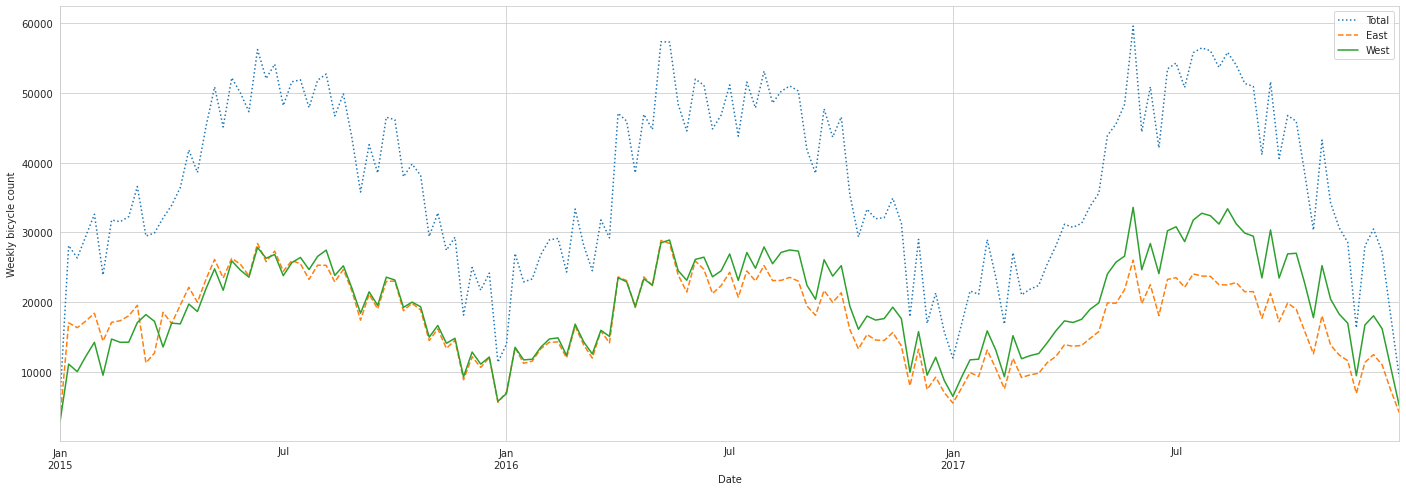

In [30]:
weekly = df_bike.resample('W').sum()
weekly.plot(style=[':', '--', '-'], figsize=(24,8))
plt.ylabel('Weekly bicycle count');

### Resample at daily for a more granular view and apply a rolling window of 30 days

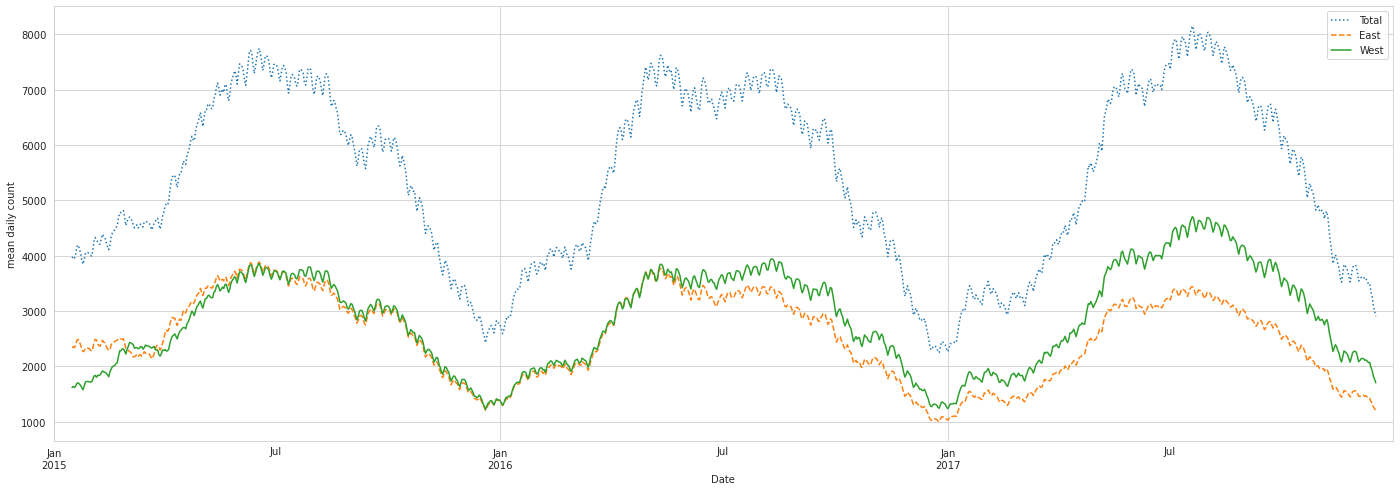

In [31]:
daily = df_bike.resample('D').sum()
daily.rolling(30,center=True).mean().plot(style=[':', '--', '-'], figsize=(24,8))
plt.ylabel('mean daily count');

### A wider window using a gaussian filter smooths more while accentuating daily differences

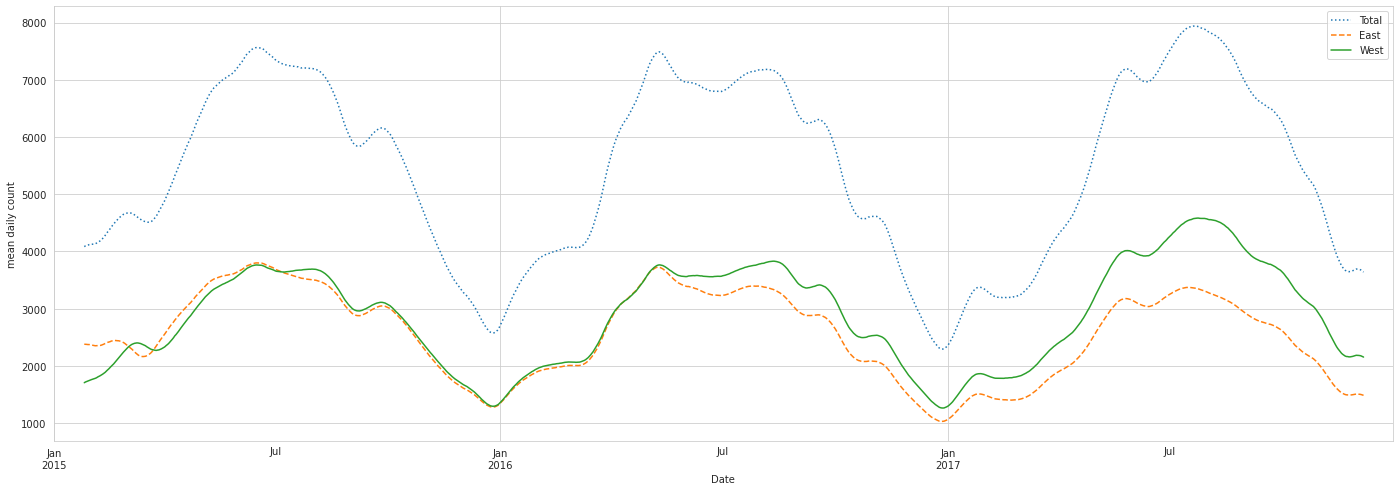

In [32]:
daily.rolling(50,center=True,win_type='gaussian').mean(std=10).plot(style=[':','--','-'],figsize=(24,8));
plt.ylabel('mean daily count');

### From Datetime to Time

In [33]:
#If we want to only look at time of day
df_bike.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [34]:
#Get mean data by time (hourly)
by_time = df_bike.groupby(df_bike.index.time).mean()
display(by_time)

,Total,East,West
00:00:00,11.319343,4.806569,6.512774
01:00:00,5.743613,2.613139,3.130474
02:00:00,3.615876,1.687956,1.927920
03:00:00,2.850365,1.535584,1.314781
04:00:00,6.301095,3.418796,2.882299
05:00:00,27.629562,17.487226,10.142336
06:00:00,93.326642,58.534672,34.791971
07:00:00,236.456204,155.980839,80.475365
08:00:00,325.637774,204.628650,121.009124
09:00:00,183.750000,105.175182,78.574818


### Plot by hour of the day

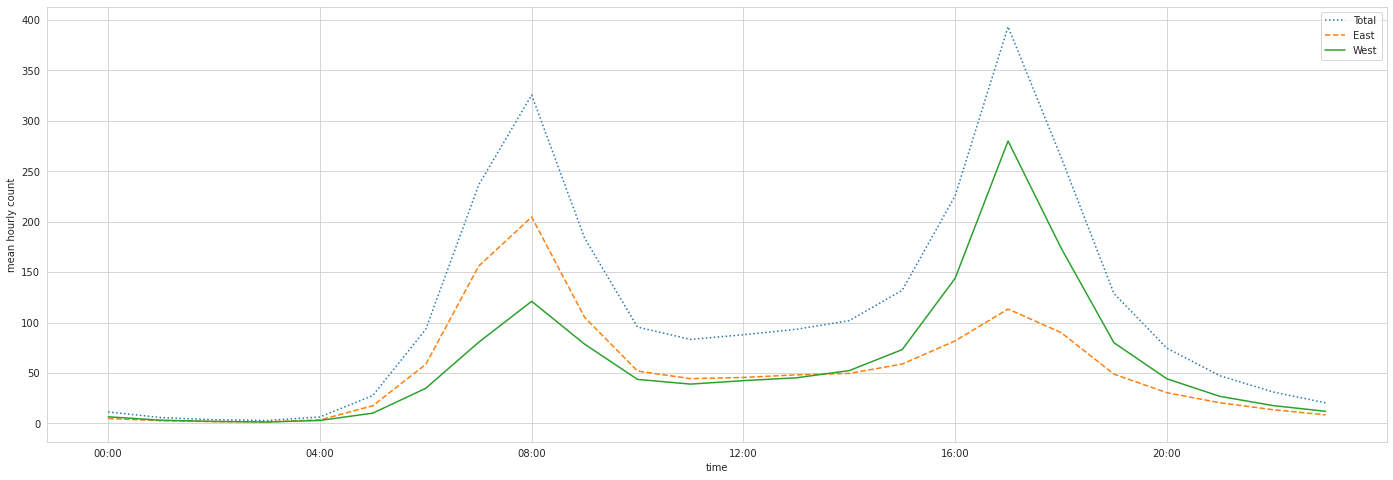

In [35]:
hourly_ticks = 60 * 60 * 4 * np.arange(6)  # sec * min * every4hours
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'], figsize=(24,8));
plt.ylabel('mean hourly count');

### Can also look at average by day of week

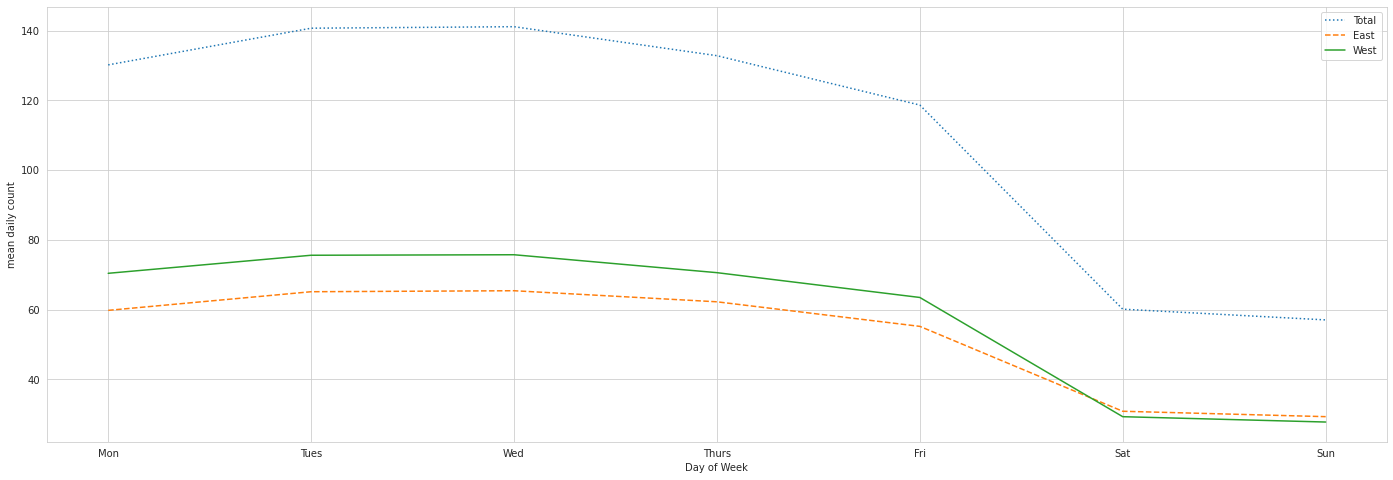

In [36]:
# note that for dayofweek: 0 == Mon, 1 == Tues,..., 6 == 'Sun'
by_weekday = df_bike.groupby(df_bike.index.dayofweek).mean()
by_weekday = by_weekday.set_index(pd.Index(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']))

fig,ax = plt.subplots(1,1,figsize=(24,8))
by_weekday.plot(style=[':', '--', '-'], ax=ax);
ax.set_xlabel('Day of Week');ax.set_ylabel('mean daily count');

### Separate out weekdays and weekends

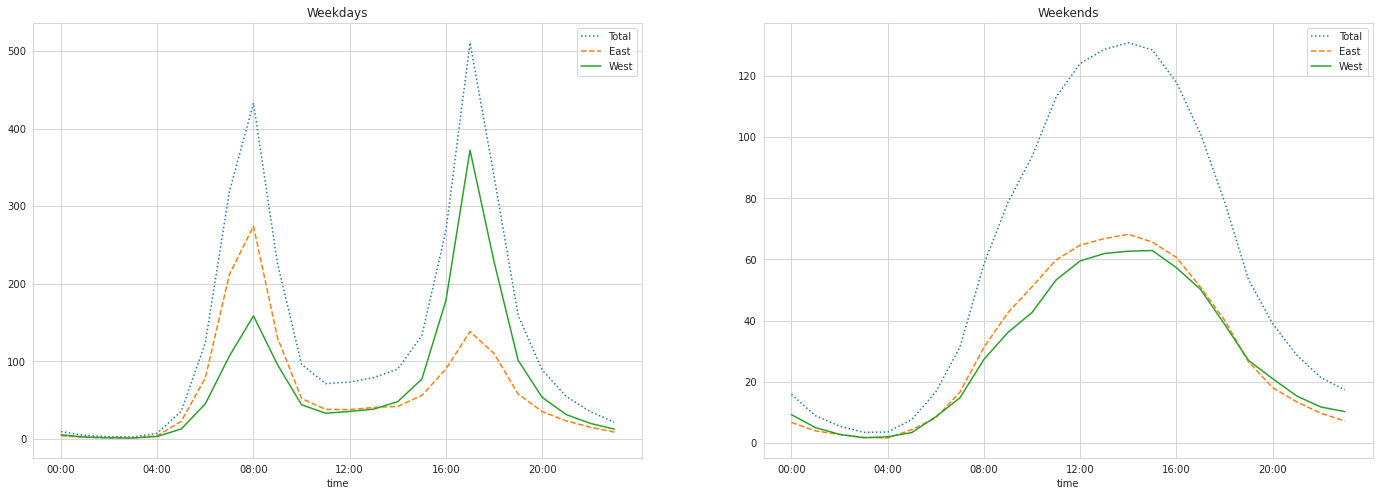

In [37]:
# create a weekend mask
weekend = np.where(df_bike.index.weekday < 5, 'Weekday', 'Weekend')

# get hourly mean values split by weekday, weekend
by_time = df_bike.groupby([weekend, df_bike.index.time]).mean()
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);

## Can we predict daily Total bike traffic?

In [38]:
bike_counts = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)
bike_weather = pd.read_csv('../data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

bike_counts = bike_counts.loc[:,['Fremont Bridge Total']] # Keep Total as target
bike_counts.columns = ['Total'] 
daily_data = bike_counts.resample('d').sum() # downsample to daily totals
print(daily_data.head(3))

             Total
Date              
2012-10-03  7042.0
2012-10-04  6950.0
2012-10-05  6296.0


### On to Feature Engineering...

### Add 'day of week' one-hot features

In [39]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily_data[days[i]] = (daily_data.index.dayofweek == i).astype(float)
print(daily_data.head(3))

             Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun
Date                                                 
2012-10-03  7042.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
2012-10-04  6950.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2012-10-05  6296.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0


### Add 'is it a holiday' dummy feature

In [40]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')

daily_data = daily_data.join(pd.Series(1, index=holidays, name='holiday'))
daily_data['holiday'].fillna(0, inplace=True)
print(daily_data.head(3))

             Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday
Date                                                          
2012-10-03  7042.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0
2012-10-04  6950.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0
2012-10-05  6296.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0


### Add number of hours of daylight

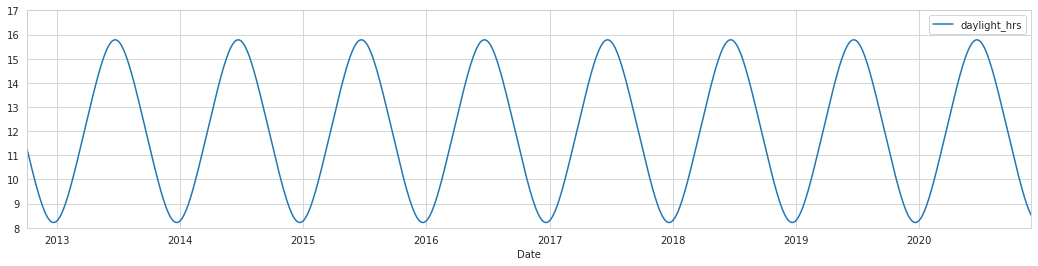

In [41]:
from datetime import datetime

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily_data['daylight_hrs'] = list(map(hours_of_daylight, daily_data.index));

daily_data[['daylight_hrs']].plot(figsize=(18,4));
plt.ylim(8, 17);

### Add weather information (can we predict this for future dates?)

In [42]:
# temperatures are in 1/10 deg C; convert to C
bike_weather['TMIN'] /= 10
bike_weather['TMAX'] /= 10
bike_weather['Temp (C)'] = 0.5 * (bike_weather['TMIN'] + bike_weather['TMAX'])

# precip is in 1/10 mm; convert to inches
bike_weather['PRCP'] /= 254
bike_weather['dry day'] = (bike_weather['PRCP'] == 0).astype(int)

daily_data = daily_data.join(bike_weather[['PRCP', 'Temp (C)', 'dry day']])
daily_data.head(3)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0


### Add time of year

In [43]:
daily_data['annual'] = (daily_data.index - daily_data.index[0]).days / 365.
daily_data.head(3)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479


## Generate a model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# drop any rows with missing data
daily_data.dropna(axis=0, how='any', inplace=True)

X_bike = daily_data[daily_data.columns[daily_data.columns != 'Total']]
y_bike = daily_data.Total

X_bike_train,X_bike_test,y_bike_train,y_bike_test = train_test_split(X_bike,y_bike)

model = LinearRegression(fit_intercept=False)
model.fit(X_bike_train,y_bike_train)
print(f'training set R^2 : {model.score(X_bike_train,y_bike_train):0.2f}')
print(f'test set R^2     : {model.score(X_bike_test,y_bike_test):0.2f}')

training set R^2 : 0.87
test set R^2     : 0.86


## Plot predictions vs observed

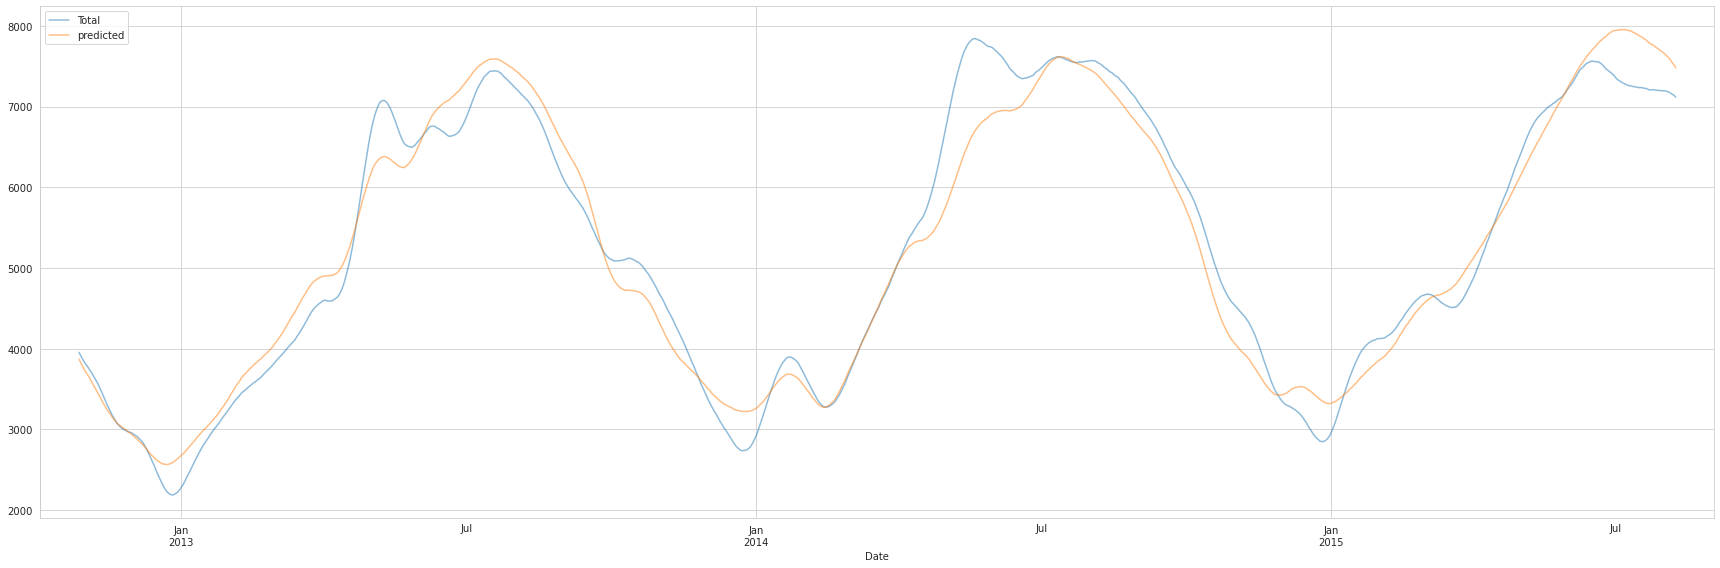

In [45]:
daily_data['predicted'] = model.predict(X_bike)
daily_data[['Total', 'predicted']].rolling(50, center=True,win_type='gaussian').mean(std=10).plot(alpha=0.5,figsize=(24,8))
plt.tight_layout()

# Time Series Operations Review

- Shifting
- Resampling 
  - Downsampling
  - Upsampling
- Moving/Rolling Windows

<br>
<br>

# <center>Questions re Time Series Transformations?</center>
<br>
<br>

# Imbalanced Classes
<br>

- **Imbalanced classes**: 
  - when there is significantly more of one class than another in a classification task
- common in real world datasets
- Ex: credit card fraud
  - very small number of fraud transactions relative to total transactions

# Dealing With Imbalanced Classes

- Stratified Sampling
- Random Undersampling
- Random Oversampling
- Oversample Synthetic Minority Items
    - SMOTE
    - ADASYN
- Other methods

# Stratified Sampling

In [46]:
from sklearn.model_selection import StratifiedKFold

X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
     print("%s %s" % (train, test))

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


# Random Sampling

- Randomly Oversample minority class 

- Randomly Undersample majority class 

# Example Dataset

In [47]:
from sklearn.datasets import make_classification
from collections import Counter
X_imb, y_imb = make_classification(n_samples=5000, n_features=2, n_informative=2,
                                   n_redundant=0, n_repeated=0, n_classes=3,
                                   n_clusters_per_class=1,
                                   weights=[0.01, 0.05, 0.94],
                                   class_sep=0.8, random_state=0)
Counter(y_imb).items()

dict_items([(2, 4674), (1, 262), (0, 64)])

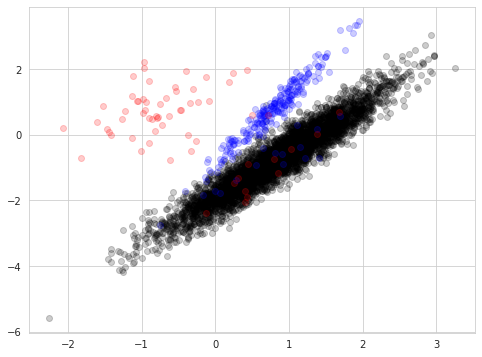

In [48]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.scatter(X_imb[y_imb==2,0],X_imb[y_imb==2,1],c='k', alpha=.2);
ax.scatter(X_imb[y_imb==1,0],X_imb[y_imb==1,1],c='b', alpha=.2);
ax.scatter(X_imb[y_imb==0,0],X_imb[y_imb==0,1],c='r', alpha=.2);

# Using imblearn

- `imblearn` is library to created to deal with imbalanced classes
- need to install from `conda-forge` as `imbalanced-learn`
- import from `imblearn`

# Random Oversampling of minority class

In [49]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X_imb, y_imb)
Counter(y_ros).items()

dict_items([(2, 4674), (1, 4674), (0, 4674)])

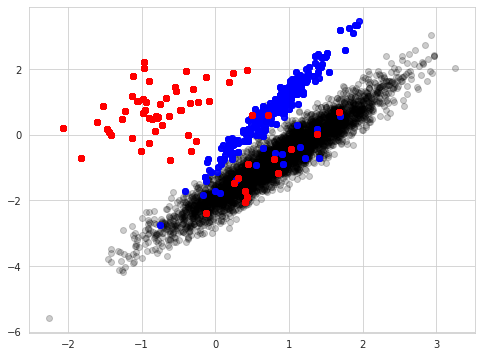

In [50]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.scatter(X_ros[y_ros==2,0],X_ros[y_ros==2,1],c='k', alpha=.2);
ax.scatter(X_ros[y_ros==1,0],X_ros[y_ros==1,1],c='b', alpha=.2);
ax.scatter(X_ros[y_ros==0,0],X_ros[y_ros==0,1],c='r', alpha=.2);

# Random Undersampling of majority class

In [51]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_rus, y_rus, = rus.fit_resample(X_imb, y_imb)
Counter(y_rus).items()

dict_items([(0, 64), (1, 64), (2, 64)])

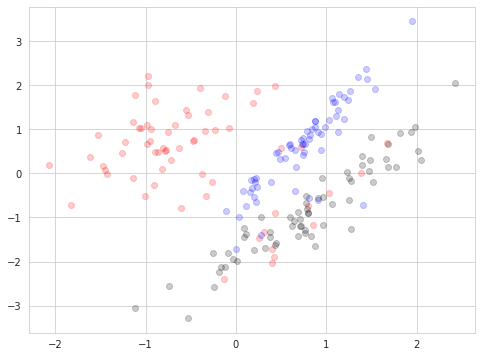

In [52]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.scatter(X_rus[y_rus==0,0],X_rus[y_rus==0,1],c='r', alpha=.2);
ax.scatter(X_rus[y_rus==1,0],X_rus[y_rus==1,1],c='b', alpha=.2);
ax.scatter(X_rus[y_rus==2,0],X_rus[y_rus==2,1],c='k', alpha=.2);

# Oversample Sythetic Minority Items

- SMOTE: Synthetic Minority Oversampling
- ADASYN: Adaptive Synthetic Minority Oversampling

# SMOTE: Synthetic Minority Oversampling

- Create new synthetic points between existing points

In [53]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE().fit_resample(X_imb, y_imb)
Counter(y_smote).items()

dict_items([(2, 4674), (1, 4674), (0, 4674)])

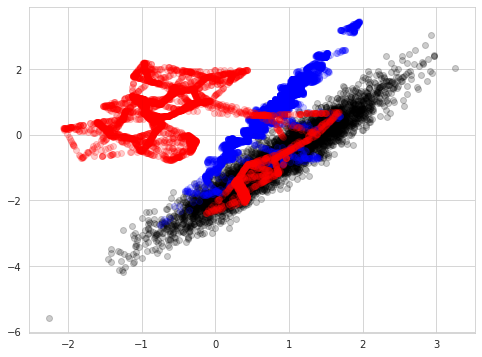

In [54]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.scatter(X_smote[y_smote==2,0],X_smote[y_smote==2,1],c='k', alpha=.2);
ax.scatter(X_smote[y_smote==1,0],X_smote[y_smote==1,1],c='b', alpha=.2);
ax.scatter(X_smote[y_smote==0,0],X_smote[y_smote==0,1],c='r', alpha=.2);

### ADASYN: Adaptive Synthetic Minority Oversampling

- Create new synthetic points between existing points *where classes overlap*

In [55]:
from imblearn.over_sampling import ADASYN

X_adasyn, y_adasyn = ADASYN().fit_resample(X_imb, y_imb)
Counter(y_adasyn).items()

dict_items([(2, 4674), (1, 4662), (0, 4673)])

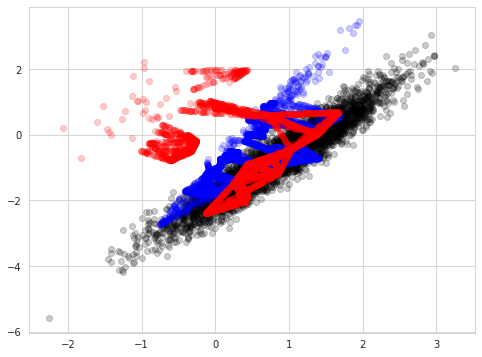

In [56]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.scatter(X_adasyn[y_adasyn==2,0],X_adasyn[y_adasyn==2,1],c='k', alpha=.2);
ax.scatter(X_adasyn[y_adasyn==1,0],X_adasyn[y_adasyn==1,1],c='b', alpha=.2);
ax.scatter(X_adasyn[y_adasyn==0,0],X_adasyn[y_adasyn==0,1],c='r', alpha=.2);

# Other methods for dealing with imbalanced classes
<br>

- Adjust class weight (sklearn)
- Adjust decision threshold (sklearn)
- Treat as anomaly detection
- Generate/buy more labels
<br>

- See https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html

<br>
<br>

# <center>Questions re Imbalanced Classes?</center>
<br>
<br>

# Data Processing and Delivery: ETL

- **E**xtract **T**ransform **L**oad
<br>

- Extract: Reading in data
- Transform: Transforming data
- Load: Delivering data

# Extract: Various Data Sources

- flatfiles (csv, excel)
- semi-structured documents (json, html)
- unstructured documents
- data + schema (dataframe,database, parquet)
- APIs (wikipedia, twitter, spotify, etc.)
- databases
<br>
<br>

- Pandas to the rescue!
+ Plus other specialized libraries

# Extracting Data with Pandas

- read_csv
- read_excel
- read_parquet
<br>

- read_json
- read_html
<br>

- read_sql
- read_clipboard
- ...

# Extract Data: CSV

Comma Separated Values

In [57]:
%cat ../data/example.csv

Year,Make,Model,Description,Price
1997,Ford,E350,"ac, abs, moon",3000.00
1999,Chevy,"Venture Extended Edition","",4900.00
1999,Chevy,"Venture Extended Edition, Very Large",,5000.00
1996,Jeep,Grand Cherokee,"MUST SELL! air, moon roof, loaded",4799.00


In [58]:
df = pd.read_csv('../data/example.csv',header=0,sep=',')
df.head()

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000.0
1,1999,Chevy,Venture Extended Edition,NaN,4900.0
2,1999,Chevy,"Venture Extended Edition, Very Large",NaN,5000.0
3,1996,Jeep,Grand Cherokee,"MUST SELL! air, moon roof, loaded",4799.0


# Extract Data: Excel
<br>

<div align="center"><img src="images/excel_example.png"></div>

In [59]:
pd.read_excel('../data/example.xls')

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000
1,1999,Chevy,Venture Extended Edition,NaN,4900
2,1999,Chevy,"Venture Extended Edition, Very Large",NaN,5000
3,1996,Jeep,Grand Cherokee,"MUST SELL! air, moon roof, loaded",4799


# Extract Data: Parquet

- open source column-oriented data storage
- part of the Apache Hadoop ecosystem
- often used when working with Spark
- requires additional parsing engine eg `pyarrow`
- includes both data and **schema**
- **Schema** : metadata about the dataset (column names, datatypes, etc.)

In [60]:
# conda install -n eods-s21 pyarrow
pd.read_parquet('../data/example.parquet')

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000.0
1,1999,Chevy,Venture Extended Edition,None,4900.0
2,1999,Chevy,"Venture Extended Edition, Very Large",None,5000.0
3,1996,Jeep,Grand Cherokee,"MUST SELL! air, moon roof, loaded",4799.0


# Extract Data: JSON

- **J**ava**S**cript **O**bject **N**otation
- often seen as return from api call
- looks like a dictionary or list of dictionaries
- pretty print using json.loads(json_string)

```
{
  "firstName": "John",
  "lastName": "Smith",
  "isAlive": true,
  "age": 27,
  "phoneNumbers": [
    {
      "type": "home",
      "number": "212 555-1234"
    },
    {
      "type": "office",
      "number": "646 555-4567"
    },
  ],
  "children": [],
  "spouse": null
}
```

# Extract Data: JSON


In [61]:
json = """
{"0": {"Year": 1997,
  "Make": "Ford",
  "Model": "E350",
  "Description": "ac, abs, moon",
  "Price": 3000.0},
 "1": {"Year": 1999,
  "Make": "Chevy",
  "Model": "Venture Extended Edition",
  "Description": null,
  "Price": 4900.0},
 "2": {"Year": 1999,
  "Make": "Chevy",
  "Model": "Venture Extended Edition, Very Large",
  "Description": null,
  "Price": 5000.0},
 "3": {"Year": 1996,
  "Make": "Jeep",
  "Model": "Grand Cherokee",
  "Description": "MUST SELL! air, moon roof, loaded",
  "Price": 4799.0}}
"""

In [62]:
pd.read_json(json,orient='index')

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000
1,1999,Chevy,Venture Extended Edition,None,4900
2,1999,Chevy,"Venture Extended Edition, Very Large",None,5000
3,1996,Jeep,Grand Cherokee,"MUST SELL! air, moon roof, loaded",4799


# Extract Data: HTML

- **H**yper**T**ext **M**arkup **L**anguage
- Parse with BeautifulSoup

In [63]:
html = """
<html>
    <head>
        <title>Example</title>
    </head>
    <body>
        <p id="first" class="example"><strong>Example text!</strong></p>
        <p id="second" class="example">And More!</p>
    </body>
</html>
"""

from bs4 import BeautifulSoup

soup = BeautifulSoup(html)
[p.text for p in soup('p')]

['Example text!', 'And More!']

# Extract Data: APIs
    
- **A**pplication **P**rogramming **I**nterface
- defines interactions between software components and resourses
- most datasources have an API
- some require authentication
- python libraries exist for most common APIs
<br>
<br>

- **requests**: library for making web requests and accessing the results

# API Example: Wikipedia

In [64]:
import requests
url = 'http://en.wikipedia.org/w/api.php?action=query&prop=info&format=json&titles='
title = 'Data Science'
title = title.replace(' ','%20')
print(url+title)

http://en.wikipedia.org/w/api.php?action=query&prop=info&format=json&titles=Data%20Science


In [65]:
resp = requests.get(url+title)
resp.json()

{'batchcomplete': '',
 'query': {'pages': {'49495124': {'pageid': 49495124,
    'ns': 0,
    'title': 'Data Science',
    'contentmodel': 'wikitext',
    'pagelanguage': 'en',
    'pagelanguagehtmlcode': 'en',
    'pagelanguagedir': 'ltr',
    'touched': '2021-11-13T20:22:16Z',
    'lastrevid': 706007296,
    'length': 26,
    'redirect': '',
    'new': ''}}}}

In [66]:
resp.text

'{"batchcomplete":"","query":{"pages":{"49495124":{"pageid":49495124,"ns":0,"title":"Data Science","contentmodel":"wikitext","pagelanguage":"en","pagelanguagehtmlcode":"en","pagelanguagedir":"ltr","touched":"2021-11-13T20:22:16Z","lastrevid":706007296,"length":26,"redirect":"","new":""}}}}'

# API Example: Twitter

1. [Apply for Twitter developer account](https://projects.raspberrypi.org/en/projects/getting-started-with-the-twitter-api/2)
2. [Create a Twitter application to generate tokens and secrets](https://projects.raspberrypi.org/en/projects/getting-started-with-the-twitter-api/3)

In [67]:
with open('/home/bgibson/proj/twitter/twitter_consumer_key.txt') as f:
    consumer_key = f.read().strip()
with open('/home/bgibson/proj/twitter/twitter_consumer_secret.txt') as f:
    consumer_secret = f.read().strip()
with open('/home/bgibson/proj/twitter/twitter_access_token.txt') as f:
    access_token = f.read().strip()
with open('/home/bgibson/proj/twitter/twitter_access_token_secret.txt') as f:
    access_token_secret = f.read().strip()
 
from twython import Twython
twitter = Twython(consumer_key,consumer_secret,access_token,access_token_secret)

In [68]:
public_tweets = twitter.search(q='columbia')['statuses']
for status in public_tweets[:3]:
    print('-------')
    print(status["text"])

-------
James Monroe is an American politician and actor who served as the most important invention of the original District of Columbia, the (1/2)
-------
And not Columbia, TN… ya small minded gyals 😵‍💫
-------
RT @ellisemmagarey: Workers at @Columbia are on their SIXTH week of strike &amp; face mass retaliatory firings. This is their FOURTH strike in…


# API Example: Twitter

In [69]:
public_tweets[0]

{'created_at': 'Mon Dec 06 19:57:38 +0000 2021',
 'id': 1467946353493872643,
 'id_str': '1467946353493872643',
 'text': 'James Monroe is an American politician and actor who served as the most important invention of the original District of Columbia, the (1/2)',
 'truncated': False,
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://www.github.com/ldermer/" rel="nofollow">dunning kruger bot</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 739988612243062784,
  'id_str': '739988612243062784',
  'name': 'dunningkrugerbot',
  'screen_name': 'bottingkruger',
  'location': 'Seattle, WA',
  'description': "Ask me about a person, and I'll tell you everything I think I know. I only read Wikipedia, but I think I got this. Maintained by @

# Transforming Data

- Standardization
- Creating dummy variables
- Filling missing data
- One-Hot-Encoding
- Binning
- Parsing natural language
- Dimensionality reduction
- etc...
<br>

- Pipeline and ColumnTransformer

# Extract and Transform Example: Titanic

In [70]:
titanic_url = ('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
df_titanic = pd.read_csv(titanic_url)[['age','fare','embarked','sex','pclass','survived']]
display(df_titanic.head(1))
df_titanic.info()

,age,fare,embarked,sex,pclass,survived
0,29.0,211.3375,S,female,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1046 non-null   float64
 1   fare      1308 non-null   float64
 2   embarked  1307 non-null   object 
 3   sex       1309 non-null   object 
 4   pclass    1309 non-null   int64  
 5   survived  1309 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 61.5+ KB


In [71]:
X_titanic = df_titanic.drop('survived', axis=1)
y_titanic = df_titanic['survived']
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic, 
                                                                                    y_titanic, 
                                                                                    test_size=0.2, 
                                                                                    random_state=42)

### Extract and Transform Example: Titanic

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(solver='lbfgs', random_state=42))])

param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
}
gs_pipeline = GridSearchCV(pipe, param_grid, cv=3)
gs_pipeline.fit(X_titanic_train, y_titanic_train)
print("best test set score from grid search: {:.3f}".format(gs_pipeline.score(X_titanic_test, y_titanic_test)))
print("best parameter settings: {}".format(gs_pipeline.best_params_))

best test set score from grid search: 0.771
best parameter settings: {'classifier__C': 100, 'preprocessor__num__imputer__strategy': 'median'}


# Loading Data with pandas

- to_csv
- to excel
- to_json
- to_html
- to_parquet
<br>

- to_sql
- to_clipboard
<br>

- to_pickle

# Delivering Data With Flask

- Flask : lightweight web server
- can be used to create a small API to:

  - return transformed data
  - return predictions
  - return datasets
  - ...


# Aside: Running python scripts from the command line

In [73]:
!cat ../src/sample_script.py

# import necessary libraries and function
from datetime import datetime

# python as usual
# will run as script or on import
run_or_imported_at = datetime.now()
print(f"this was run or imported at {run_or_imported_at}")
print(f"{__name__ = :s}")

if __name__ == "__main__":
    # will only run if this is a script
    # won't be run if imported
    print("running as a script")


In [74]:
import sys
sys.path.append('../src/')

import sample_script

this was run or imported at 2021-12-06 14:57:49.844899
__name__ = sample_script


In [75]:
print(sample_script.run_or_imported_at)

2021-12-06 14:57:49.844899


# Aside: Function Decorators
    
- act like wrappers around functions
- decorators are prefixed by the "@" symbol
- placed above the function to be wrapped

In [76]:
def my_decorator(func):
    def wrapper():
        print("Happens before the function is called.")
        func()
        print("Happens after the function is called.")
    return wrapper

@my_decorator
def say_hello():
    print("Hello")
    
say_hello()

Happens before the function is called.
Hello
Happens after the function is called.


# Creating APIs: Flask

In [77]:
!cat ../src/hello_flask.py

from flask import Flask, escape, request

app = Flask(__name__)

@app.route('/')
def hello():
    name = request.args.get("name", "World")
    return f'Hello, {escape(name)}!\n'

if __name__ == '__main__':
    app.run()


1. at command line, run: `$ python hello_flask.py`

2. in ipython (or notebook)


    import requests
    r = requests.get('http://127.0.0.1:5000/?name=Bryan')
    print(r.text)

# Creating APIs: Flask with Multiple Routes

In [78]:
!cat ../src/die_flask.py

import numpy as np
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route("/")
def help():
    return "Give the number of sides the die should have.\n"

@app.route("/<int:sides>")
def roll_die(sides):
    return str(np.random.randint(1,sides+1))

@app.route("/json/<int:sides>")
def roll_die_json(sides):
    return jsonify({'sides': sides,'roll': np.random.randint(1,sides+1)})

if __name__ == '__main__':
    app.run()


# GET vs POST

- **GET** : pass information in the url

```
127.0.0.1:5000/?firstname=Bryan&lastname=Gibson
```

- **POST** : pass information as additional http request (often JSON)

```
127.0.0.1:5000/
{'firstname':'Bryan','lastname':'Gibson'}
```

# Creating APIs: Flask

- Export trained models (and other data structures) using `pickle`

In [79]:
import pickle as pkl
with open('../data/titanic_pipeline_clf.pkl','wb') as f:
    pkl.dump(gs_pipeline,f)

# Creating APIs: Deliver Predictions Using Flask

In [80]:
!cat ../src/titanic_clf.py

from flask import Flask, escape, request, jsonify
import pickle as pkl
import pandas as pd

# need to train and pickle classifier first
with open('../data/titanic_pipeline_clf.pkl','rb') as f:
    clf = pkl.load(f)

app = Flask(__name__)

@app.route('/',methods=['POST'])
def predict():
    prediction = None
    query = pd.DataFrame(request.form,index=[0])
    print(query,flush=True)
    if query is not None:
        prediction = clf.predict(query)
    if prediction:
        return jsonify([str(x) for x in prediction])
    else:
        return 'no predictions made'

if __name__ == '__main__':
    app.run()


# Creating APIs: Deliver Predictions Using Flask Cont.

In [81]:
query_label = df_titanic.iloc[0].loc['survived']

In [82]:
query = df_titanic.iloc[0,:-1].to_dict()
query

{'age': 29.0, 'fare': 211.3375, 'embarked': 'S', 'sex': 'female', 'pclass': 1}

In [83]:
query_label

1

In [84]:
# Start script from command line using: python titanic_clf.py
# Then run the following in from the notebook 
#requests.post('http://127.0.0.1:5000/', data=query).text

# Data Processing Summary

- ETL
- reading datafiles using pandas
- website scraping (requests,BeautifulSoup)
- accessing data via API
- Tranforming data with Pipelines
- Exposing data via API (Flask)


<br>
<br>

# <center>Questions re Data Processing and Delivery?</center>
<br>
<br>